In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA



In [21]:
data = pd.read_csv('myopia.csv')
target = data['MYOPIC']
new_data = data.drop('MYOPIC', axis='columns')
new_data.columns



Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [22]:
new_data.head(20)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.700000,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.290000,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.520000,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.730000,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.160000,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.360000,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.490000,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.080000,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.740000,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.540000,30,5,1,0,10,27,0,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(new_data, target, random_state=1)

In [27]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.40322346,  1.37228589, -0.73720637, ..., -0.69140609,
         0.95562709, -1.00216216],
       [-0.40322346, -1.71452664,  0.31275476, ..., -0.11610873,
        -1.04643329,  0.9978425 ],
       [ 2.49123329, -0.17924356,  1.39229581, ..., -0.18003066,
         0.95562709, -1.00216216],
       ...,
       [ 2.49123329, -0.20036387,  0.7268255 , ...,  2.56861227,
        -1.04643329,  0.9978425 ],
       [-0.40322346, -1.32786277,  0.3571204 , ..., -0.56356223,
         0.95562709,  0.9978425 ],
       [-0.40322346,  1.1578337 ,  0.34233185, ..., -0.37179644,
        -1.04643329,  0.9978425 ]])

In [28]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.40322346, -0.60002486, -1.35831107, ...,  0.26742284,
        -1.04643329,  0.9978425 ],
       [-1.85045183, -1.30511783, -1.65407628, ...,  0.01173513,
        -1.04643329,  0.9978425 ],
       [-0.40322346, -0.44405956, -0.02737325, ..., -0.9470938 ,
        -1.04643329, -1.00216216],
       ...,
       [ 2.49123329,  0.01733765, -0.07173606, ...,  0.65095441,
         0.95562709,  0.9978425 ],
       [-0.40322346,  2.87507634, -3.28077647, ..., -0.81924994,
        -1.04643329, -1.00216216],
       [-0.40322346, -1.37497727, -1.22521699, ...,  1.67370527,
         0.95562709, -1.00216216]])

In [30]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler()
X_scaler.fit(X_train_scaled)

StandardScaler()

In [32]:
# Initialize PCA model for 3 principal components
pca = PCA(n_components=2)

# Get two principal components for the iris data.
myopic_pca = pca.fit_transform(X_train_scaled)

In [33]:
df_myopic_pca = pd.DataFrame(
    data=myopic_pca,
    columns=["principal component 1", "principal component 2"],
)
df_myopic_pca.head()

,principal component 1,principal component 2
0,-1.478505,0.022517
1,0.311951,-0.686514
2,2.602496,-0.826148
3,-1.607016,0.221471
4,0.400975,-2.196268


In [34]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.20857533, 0.15232599])

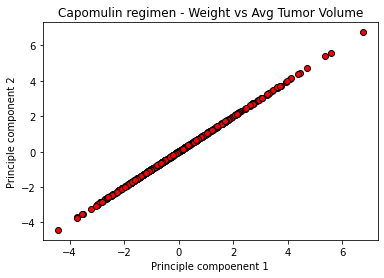

In [36]:
import matplotlib.pyplot as plt

plt.scatter(df_myopic_pca["principal component 1"], df_myopic_pca["principal component 1"], marker="o", facecolors="red", edgecolors="black")

# plt.ylim(29,49)
# plt.xlim(14,26)

plt.title("Capomulin regimen - Weight vs Avg Tumor Volume")
plt.xlabel("Principle compoenent 1")
plt.ylabel("Principle component 2")

plt.show()